# Data Overview


In [42]:
import pandas as pd

# Load the datasets
rental_price_data = pd.read_csv('../data/rental_price.csv')
rating_features_data = pd.read_csv('../data/rating_features.csv')

print(rental_price_data.head())
print(rating_features_data.head())

print(rental_price_data.describe())
print(rating_features_data.describe())

     price
0  $300.00
1   $99.00
2  $100.00
3  $100.00
4  $599.00
   accommodates                                          amenities  \
0             6  {"Cable TV",Internet,"Wireless Internet","Air ...   
1             2  {"Air Conditioning",Heating,"Family/Kid Friend...   
2             2  {TV,"Cable TV",Internet,"Wireless Internet","A...   
3             2  {TV,"Cable TV",Internet,"Wireless Internet","A...   
4             6  {TV,"Cable TV",Internet,"Wireless Internet","A...   

   availability_30  bathrooms  bed_type  bedrooms  beds  \
0                0        2.5  Real Bed       1.0   3.0   
1               29        0.0     Futon       1.0   1.0   
2               30        1.5  Real Bed       1.0   1.0   
3               30        1.5  Real Bed       1.0   1.0   
4               27        2.0  Real Bed       3.0   3.0   

   calculated_host_listings_count cancellation_policy  guests_included  \
0                               1            moderate                1   
1         

# Nature of the Data

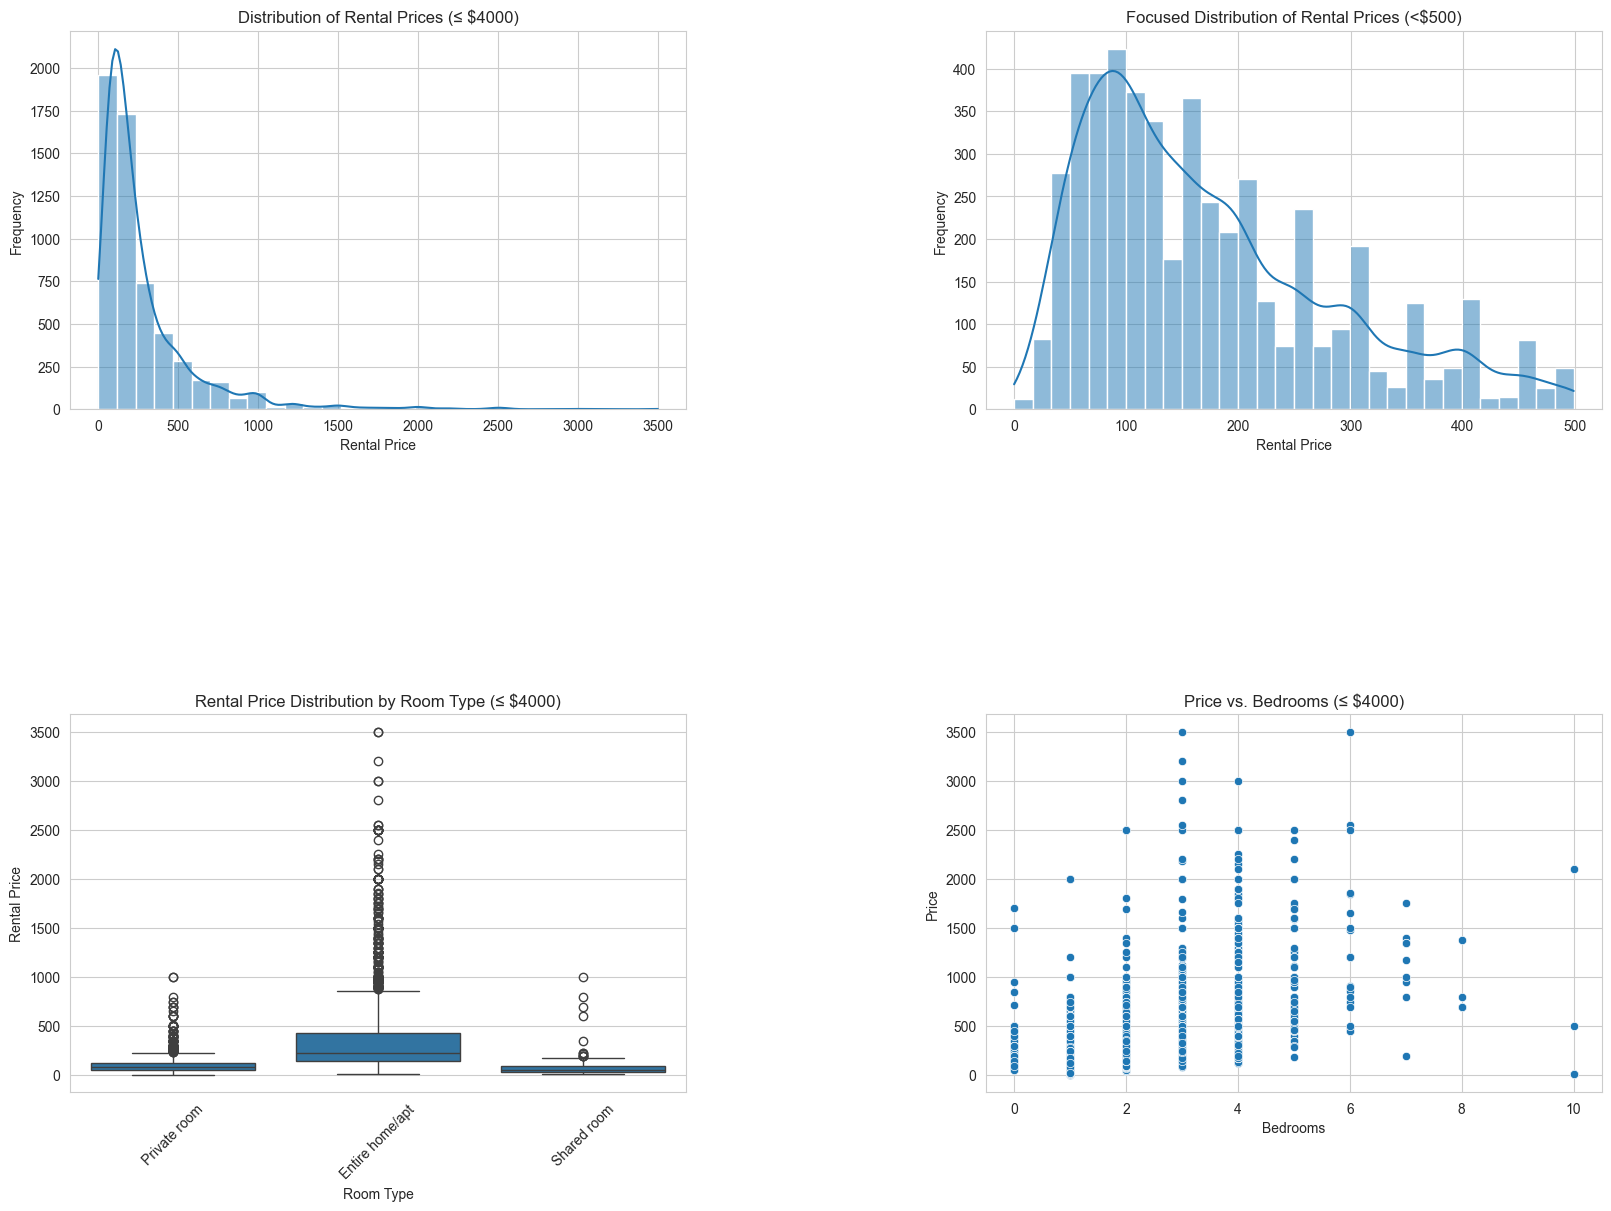

Note: Rental prices above $4000 have been excluded from the visualizations to allow for better display.


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

merged_df = pd.concat([rating_features_data, rental_price_data['price']], axis=1)

# Ensure 'price' is converted to numeric (float)
merged_df['price'] = pd.to_numeric(merged_df['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Drop any rows where 'price' could not be converted and ended up as NaN
merged_df = merged_df.dropna(subset=['price'])

# Set up the figure for a 2x2 grid of plots with increased spacing and use constrained layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'hspace': 0.4, 'wspace': 0.3}, constrained_layout=True)

# Histogram of Rental Prices (excluding prices above $4000)
filtered_prices = merged_df[merged_df['price'] <= 4000]['price']
sns.histplot(filtered_prices, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Rental Prices (≤ $4000)')
axes[0, 0].set_xlabel('Rental Price')
axes[0, 0].set_ylabel('Frequency')

# Focused Histogram of Rental Prices in a Main Area (e.g., prices below a threshold)
sns.histplot(merged_df[merged_df['price'] < 500]['price'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Focused Distribution of Rental Prices (<$500)')
axes[0, 1].set_xlabel('Rental Price')
axes[0, 1].set_ylabel('Frequency')

# Boxplot of Prices by Room Type (excluding prices above $4000)
sns.boxplot(x='room_type', y='price', data=merged_df[merged_df['price'] <= 4000], ax=axes[1, 0])
axes[1, 0].set_title('Rental Price Distribution by Room Type (≤ $4000)')
axes[1, 0].set_xlabel('Room Type')
axes[1, 0].set_ylabel('Rental Price')
axes[1, 0].tick_params(axis='x', rotation=45)

# Scatter Plot of Price vs. Bedrooms (excluding prices above $4000)
sns.scatterplot(x='bedrooms', y='price', data=merged_df[merged_df['price'] <= 4000], ax=axes[1, 1])
axes[1, 1].set_title('Price vs. Bedrooms (≤ $4000)')
axes[1, 1].set_xlabel('Bedrooms')
axes[1, 1].set_ylabel('Price')

# Adjust layout
plt.show()

# Note about excluded prices
print("Note: Rental prices above $4000 have been excluded from the visualizations to allow for better display.")

In [44]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# # 
# # 
# # # Path to the background image of China
# # china_map_path = 'china.png'  # Update this path to your actual image
# # 
# # # Load the background image
# # china_map_img = mpimg.imread(china_map_path)
# 
# # Create a plot
# fig, ax = plt.subplots(figsize=(25, 15))
# 
# 
# # Plot the data points with color corresponding to the price
# sc = ax.scatter(location_df['longitude(East)'], location_df['latitude(North)'],
#                 c=location_df['price'], cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5, zorder=1)
# 
# # Display the background image
# # ax.imshow(china_map_img, extent=[113.9, 114.4, 22.45, 22.9], aspect='auto', zorder=0)
# 
# # Add a colorbar
# cbar = plt.colorbar(sc, ax=ax, orientation='vertical')
# cbar.set_label('Price')
# 
# # Set plot title and labels
# ax.set_title('Listings in China with Prices')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
# 
# # Remove gridlines
# ax.grid(False)
# 
# # Set axis limits explicitly to prevent image from affecting zoom
# ax.set_xlim(113.9, 114.4)
# ax.set_ylim(22.45, 22.9)
# 
# # Show the plot
# plt.show()


In [45]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# 
# 
# # Path to the background image of China
# china_map_path = 'china.png'  
# 
# # Load the background image
# china_map_img = mpimg.imread(china_map_path)
# 
# # Create a plot
# fig, ax = plt.subplots(figsize=(25, 15))
# 
# 
# # Plot the data points with color corresponding to the price
# sc = ax.scatter(location_df['longitude(East)'], location_df['latitude(North)'],
#                 c=location_df['price'], cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5, zorder=1)
# 
# # Display the background image
# ax.imshow(china_map_img, aspect='auto', zorder=0)
# 
# # Add a colorbar
# cbar = plt.colorbar(sc, ax=ax, orientation='vertical')
# cbar.set_label('Price')
# 
# # Set plot title and labels
# ax.set_title('Listings in China with Prices')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
# 
# # Remove gridlines
# ax.grid(False)
# 
# # Set axis limits explicitly to prevent image from affecting zoom
# 
# # Show the plot
# plt.show()


# Preprocessing

- we only look at key ameniteis based on their frequency in the data set and perosonal obsrvation on most important amenities.

### Missing Values
- for missing values bathrooms, beds, review_scores_checkin, review_scores_communication, review_scores_location,
review_scores_rating, review_scores_value mean was assesed. 
- for is host_is_superhost flase is assumed
- for host_listings_count 1 is assuemed. Therefor it is assumed that the host only has one listing.

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Load the datasets
rental_price_data = pd.read_csv('../data/rental_price.csv')
rating_features_data = pd.read_csv('../data/rating_features.csv')

# Function to extract key amenities directly from the amenities string
def extract_key_amenities_directly(amenities):
    key_amenities = ['Internet', 'Wireless Internet', 'Kitchen', 'Heating', 'Essentials', 'TV',
                     'Washer', 'Dryer', 'Free parking on premises', 'Air conditioning', 'Breakfast',
                     'Pets allowed', 'Family/kid friendly', 'Suitable for events']
    # Normalize the amenities string for consistent matching
    amenities = amenities.lower().replace('"', '').replace('{', '').replace('}', '').replace(' ', '')
    features = {amenity: 1 if amenity.lower().replace(' ', '') in amenities else 0 for amenity in key_amenities}
    return pd.Series(features)

# Apply the function to extract key amenities and add them as new columns
key_amenities_df = rating_features_data['amenities'].apply(extract_key_amenities_directly)
rating_features_data = pd.concat([rating_features_data, key_amenities_df], axis=1)

# Optionally drop the original 'amenities' column if no longer needed
rating_features_data.drop('amenities', axis=1, inplace=True)

# Convert price from string to float
rental_price_data['price'] = rental_price_data['price'].replace('[\$,]', '', regex=True).astype(float)

# Check for missing values
print("Before Preproccessing")
print("Missing values in rental data:", rental_price_data.isnull().sum())
print("Missing values in rating features data:", rating_features_data.isnull().sum())

# Fill missing values in 'host_is_superhost' with False
rating_features_data['host_is_superhost'].fillna('f', inplace=True)

# Fill missing values in 'host_listings_count' with 1
rating_features_data['host_listings_count'].fillna(1, inplace=True)


# Fill missing values for numerical columns with the median
for column in rating_features_data.select_dtypes(include=['float64', 'int64']).columns:
    median_value = rating_features_data[column].median()
    rating_features_data[column].fillna(median_value, inplace=True)
    
#Scale Nummerical Values with MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = rating_features_data.select_dtypes(include=['float64', 'int64']).columns
rating_features_data[numerical_columns] = scaler.fit_transform(rating_features_data[numerical_columns])

# Has availabiltiy is allways true. Therefor it can be droped
rating_features_data.drop('has_availability',axis=1, inplace=True)

#Replace t and f with True and False
mapping = {'f': 0, 't': 1}
rating_features_data['host_is_superhost'] = rating_features_data['host_is_superhost'].map(mapping)
rating_features_data['instant_bookable'] = rating_features_data['instant_bookable'].map(mapping)

# Encode categorical variables using one-hot encoding
categorical_columns = ['room_type', 'bed_type', 'property_type', 'cancellation_policy']
rating_features_data = pd.get_dummies(rating_features_data, columns=categorical_columns)

#Convert all Data to numerical data
rating_features_data = rating_features_data.astype(float)

pd.set_option('display.max_columns', None)

# Convert to DataFrame and use to_string to display all columns
rental_missing = rental_price_data.isnull().sum().reset_index()
rating_missing = rating_features_data.isnull().sum().reset_index()

# Print to check if there are still missing values
print("\nMissing values in rental data:\n", rental_missing.to_string(index=False, header=['Column', 'Missing Values']))
print("Missing values in rating features data:\n", rating_missing.to_string(index=False, header=['Column', 'Missing Values']))

#Overview of all Data in the dataset
print(rental_price_data.describe())
print(rating_features_data.describe())


Before Preproccessing
Missing values in rental data: price    0
dtype: int64
Missing values in rating features data: accommodates                         0
availability_30                      0
bathrooms                           46
bed_type                             0
bedrooms                             6
beds                                23
calculated_host_listings_count       0
cancellation_policy                  0
guests_included                      0
has_availability                     0
host_is_superhost                   15
host_listings_count                 15
instant_bookable                     0
latitude(North)                      0
longitude(East)                      0
maximum_nights                       0
number_of_reviews                    0
property_type                        0
review_scores_checkin             2057
review_scores_communication       2057
review_scores_location            2056
review_scores_rating              2046
review_scores_value      

# Outlier detection

In [47]:
# Outlier detection using IQR method based on price
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

outliers = detect_outliers_iqr(rental_price_data, 'price')
print("\nOutliers detected based on price:\n", outliers.sum())

# Removing outliers
rental_price_data = rental_price_data[~outliers]
rating_features_data = rating_features_data.loc[rental_price_data.index]

# Print the datasets after removing outliers
print("\nData after outlier removal based on price:")
print(rental_price_data.describe())
print(rating_features_data.describe())



Outliers detected based on price:
 525

Data after outlier removal based on price:
             price
count  5309.000000
mean    198.539273
std     145.213826
min       0.000000
25%      90.000000
50%     150.000000
75%     260.000000
max     650.000000
       accommodates  availability_30    bathrooms     bedrooms         beds  \
count   5309.000000      5309.000000  5309.000000  5309.000000  5309.000000   
mean       0.203365         0.544566     0.169782     0.157374     0.067433   
std        0.159896         0.406433     0.075824     0.096553     0.092995   
min        0.000000         0.000000     0.000000     0.000000     0.000000   
25%        0.066667         0.033333     0.125000     0.100000     0.000000   
50%        0.200000         0.633333     0.125000     0.100000     0.066667   
75%        0.333333         0.966667     0.250000     0.200000     0.133333   
max        1.000000         1.000000     1.000000     1.000000     1.000000   

       calculated_host_listings_c

## Merge Data Sets and Definition of X and Y. 
## Train Test split to ensure there is no data leakage.

### This will be used in the rest of the code

In [48]:
from sklearn.model_selection import train_test_split
# Merge the datasets based on a common key
merged_df = pd.concat([rating_features_data, rental_price_data], axis=1)

# Analyze variance explained by each feature
X = merged_df.drop(columns='price')  # Drop rental price
y = merged_df['price']

#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Correlation Analysis

- Analysis what coloumns have an high impact on rent price.
- Variance Explination Calculation
- Correlation Matrix between the rating features

Correlation with rental price:
price                        1.000000
bedrooms                     0.556337
accommodates                 0.525013
bathrooms                    0.496421
room_type_Entire home/apt    0.461625
                               ...   
Essentials                  -0.109932
host_is_superhost           -0.125771
room_type_Shared room       -0.130241
number_of_reviews           -0.185997
room_type_Private room      -0.428413
Name: price, Length: 65, dtype: float64


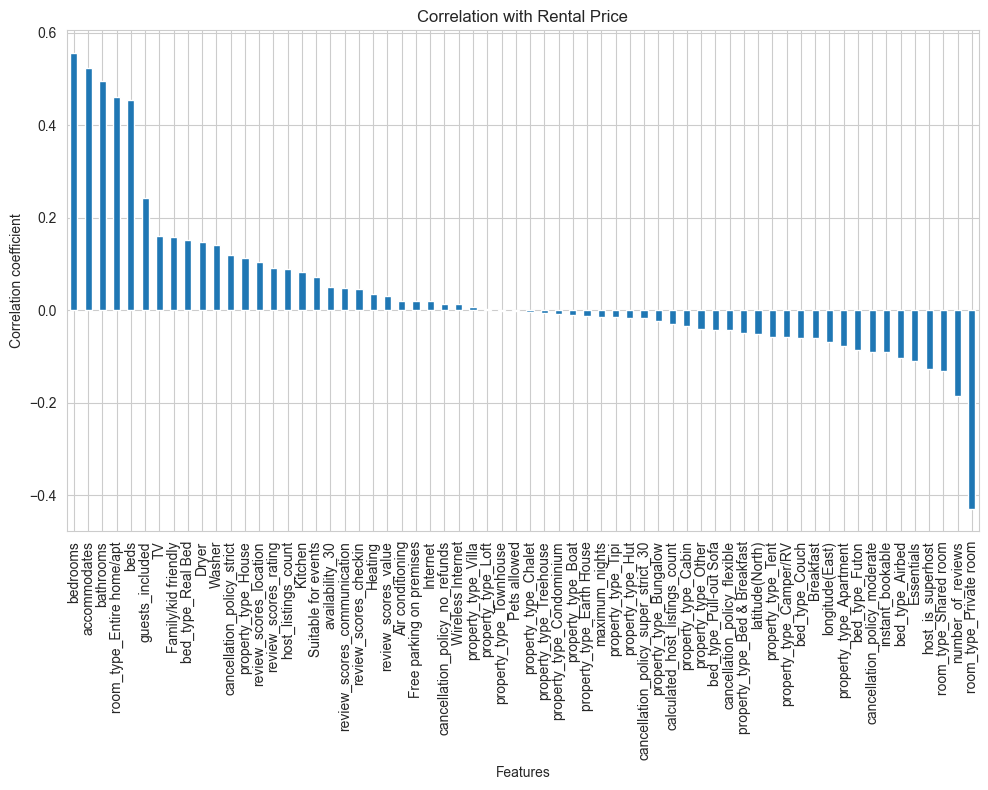

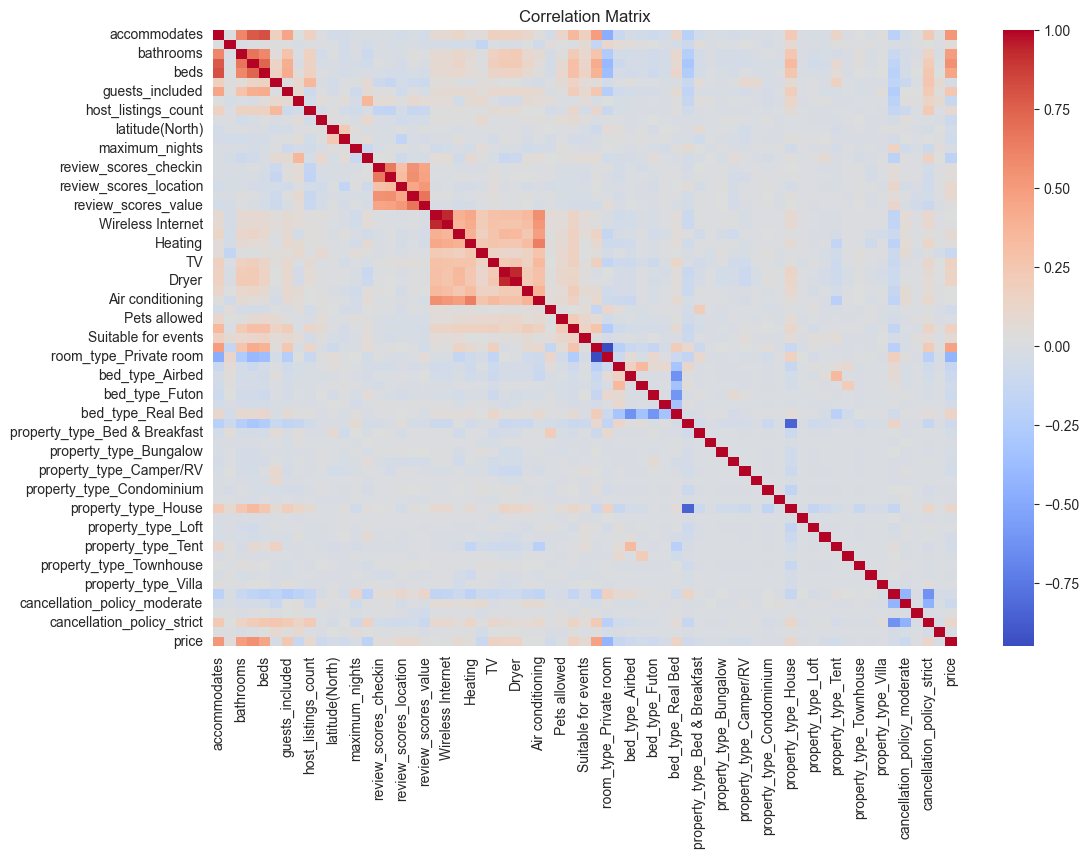

In [49]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Calculate the correlation
correlation_matrix = merged_df.corr()
rental_price_correlation = correlation_matrix['price'].sort_values(ascending=False)
pd.set_option('display.max_columns', None)
print("Correlation with rental price:")
print(rental_price_correlation)
plt.figure(figsize=(10, 8))
rental_price_correlation.drop('price').plot(kind='bar')
plt.title('Correlation with Rental Price')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,fmt='2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Model training

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R^2': r2}
    print(f"{name} - Mean Squared Error: {mse}, R^2 Score: {r2}")


Linear Regression - Mean Squared Error: 1.248245107984743e+22, R^2 Score: -6.030294650474779e+17
Decision Tree - Mean Squared Error: 16587.709039548023, R^2 Score: 0.19864478182243983
Random Forest - Mean Squared Error: 8307.216075047081, R^2 Score: 0.5986768917638986


Linear Regression - Mean Squared Error: 1.248245107984743e+22, R^2 Score: -6.030294650474779e+17
Decision Tree - Mean Squared Error: 16587.709039548023, R^2 Score: 0.19864478182243983
Random Forest - Mean Squared Error: 8307.216075047081, R^2 Score: 0.5986768917638986


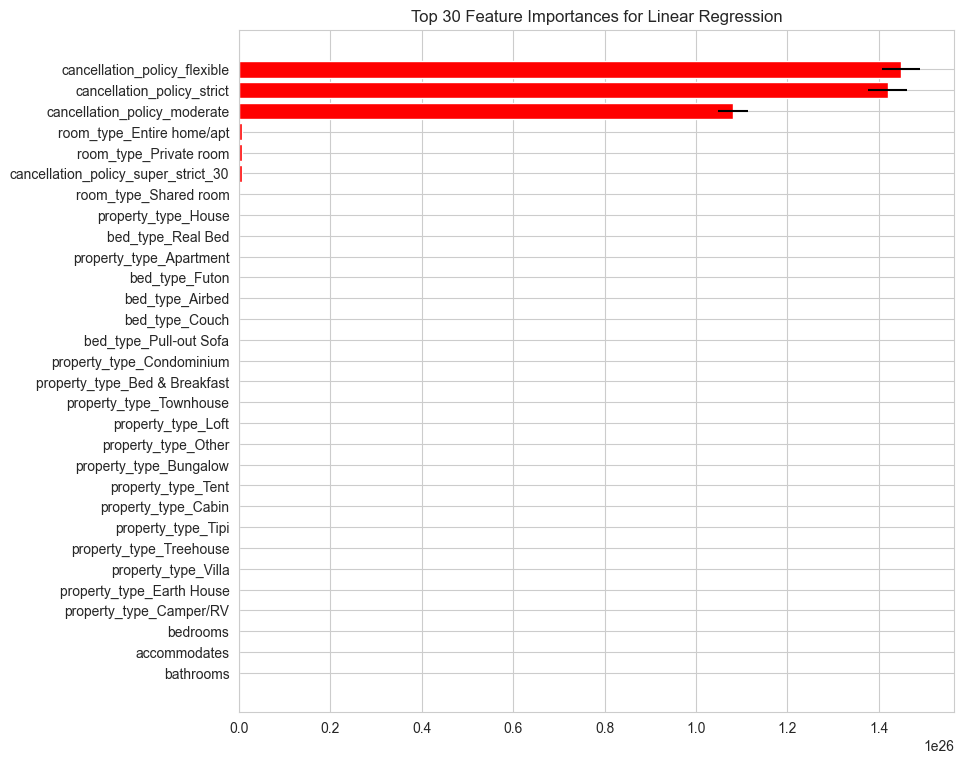

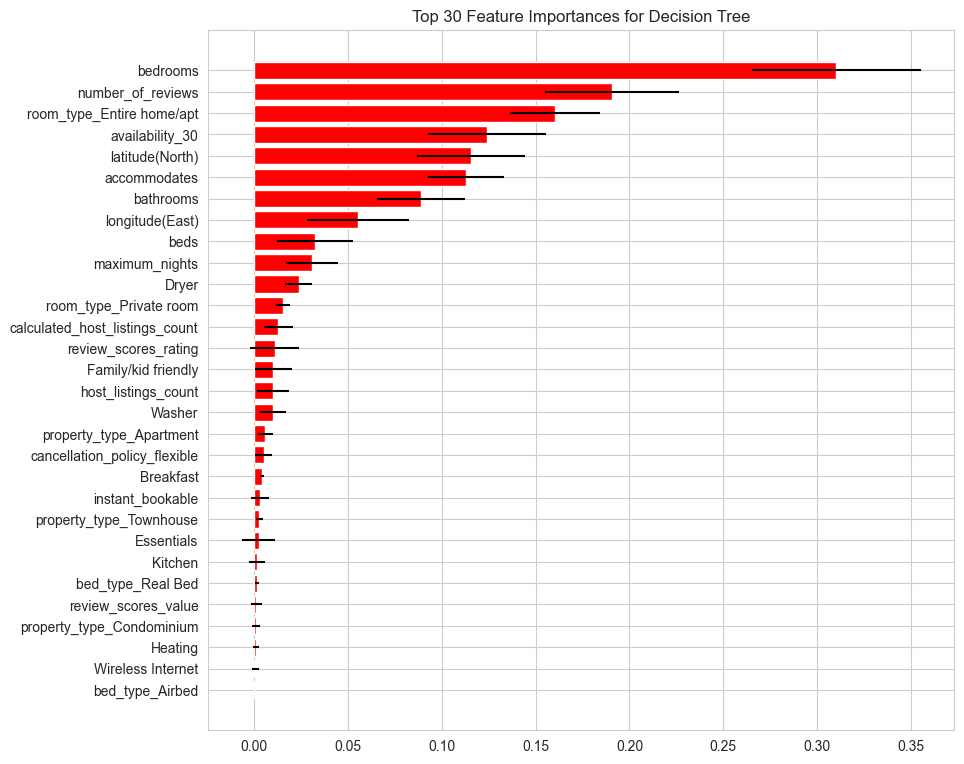

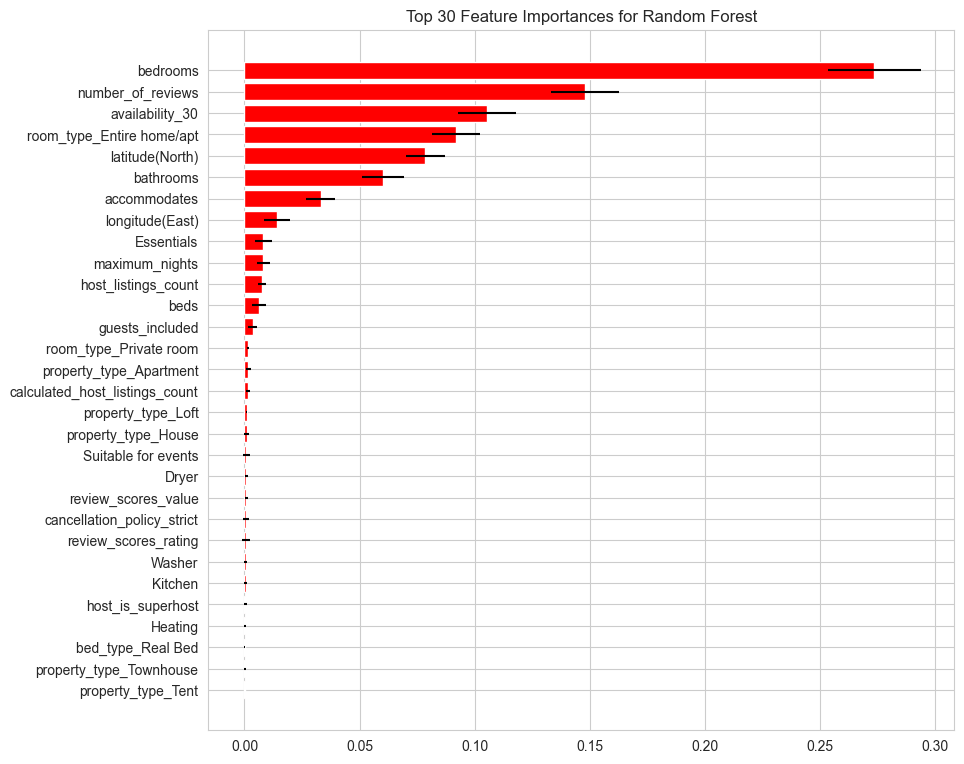

Selected top 30 important features from Random Forest: Index(['bedrooms', 'number_of_reviews', 'availability_30',
       'room_type_Entire home/apt', 'latitude(North)', 'bathrooms',
       'accommodates', 'longitude(East)', 'Essentials', 'maximum_nights',
       'host_listings_count', 'beds', 'guests_included',
       'room_type_Private room', 'property_type_Apartment',
       'calculated_host_listings_count', 'property_type_Loft',
       'property_type_House', 'Suitable for events', 'Dryer',
       'review_scores_value', 'cancellation_policy_strict',
       'review_scores_rating', 'Washer', 'Kitchen', 'host_is_superhost',
       'Heating', 'bed_type_Real Bed', 'property_type_Townhouse',
       'property_type_Tent'],
      dtype='object')
Linear Regression (Selected Features) - Mean Squared Error: 11093.178061862815, R^2 Score: 0.4640865652482641
Decision Tree (Selected Features) - Mean Squared Error: 17261.354990583804, R^2 Score: 0.16610082431874484
Random Forest (Selected Features) 

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# Train base models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Dictionary to store the permutation importance results
permutation_importances = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}, R^2 Score: {r2}")

    # Calculate permutation importance
    r = permutation_importance(model, X_test, y_test, n_repeats=100, random_state=42, n_jobs= -1)
    permutation_importances[name] = r

# Plot permutation importance for each model
for name, r in permutation_importances.items():
    importances = r.importances_mean
    std = r.importances_std
    indices = np.argsort(importances)[::-1]

    # Limit to top 30 features
    indices = indices[:30]
    importances = importances[indices]
    std = std[indices]
    features_to_plot = X_test.columns[indices]

    plt.figure(figsize=(10, 8))
    plt.title(f"Top 30 Feature Importances for {name}")
    plt.barh(features_to_plot, importances, color="r", xerr=std, align="center")
    plt.gca().invert_yaxis()  # Reverse the order of the features
    plt.tight_layout(pad=2.0)  # Increase space between lines
    plt.show()

# Select the top 30 important features based on Random Forest as an example
model_name = 'Random Forest'
top_n_features = 30
important_features = X_test.columns[np.argsort(permutation_importances[model_name].importances_mean)[::-1][:top_n_features]]
print(f"Selected top {top_n_features} important features from {model_name}: {important_features}")

# Retrain and evaluate models with selected features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

results_selected = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results_selected[name] = {'MSE': mse, 'R^2': r2}
    print(f"{name} (Selected Features) - Mean Squared Error: {mse}, R^2 Score: {r2}")


# Undervalued Hotels

In [52]:
# Predict prices for the entire dataset using the selected features
features_selected = X[important_features]
predicted_prices = model.predict(features_selected)

# Add predicted prices to the data
merged_df['predicted_price'] = predicted_prices

# Calculate the difference between actual and predicted prices
merged_df['price_difference'] = merged_df['price'] - merged_df['predicted_price']

# Calculate the percentage difference
merged_df['percentage_difference'] = (merged_df['price_difference'] / merged_df['predicted_price']) * 100

# Identify significantly undervalued hotels (e.g., where the actual price is at least 20% lower than the predicted price)
significant_threshold = -(1/3)*100  # Negative because actual price is lower than predicted
significantly_undervalued_hotels = merged_df[merged_df['percentage_difference'] < significant_threshold]

# Display the total count of significantly undervalued hotels
total_undervalued_hotels = len(significantly_undervalued_hotels)
print(f"Total number of significantly undervalued hotels: {total_undervalued_hotels}")

# Display the significantly undervalued hotels
print(significantly_undervalued_hotels[['price', 'predicted_price', 'price_difference', 'percentage_difference']])


Total number of significantly undervalued hotels: 430
      price  predicted_price  price_difference  percentage_difference
6      54.0            87.35            -33.35             -38.179737
18     59.0           185.15           -126.15             -68.133945
23     50.0            83.25            -33.25             -39.939940
24    120.0           222.47           -102.47             -46.060143
80    249.0           413.99           -164.99             -39.853620
...     ...              ...               ...                    ...
5667  199.0           324.40           -125.40             -38.655980
5741   80.0           120.81            -40.81             -33.780316
5766   99.0           155.12            -56.12             -36.178442
5771   25.0            57.89            -32.89             -56.814648
5832   25.0           137.95           -112.95             -81.877492

[430 rows x 4 columns]


In [53]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# 
# 
# # Path to the background image of China
# china_map_path = 'china.png'  # Update this path to your actual image
# 
# # Load the background image
# china_map_img = mpimg.imread(china_map_path)
# 
# # Create a plot
# fig, ax = plt.subplots(figsize=(25, 15))
# 
# 
# # Plot the data points with color corresponding to the price
# sc = ax.scatter(significantly_undervalued_hotels['longitude(East)'], significantly_undervalued_hotels['latitude(North)'],
#                 c=significantly_undervalued_hotels['price'], cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5, zorder=1)
# 
# # Display the background image
# ax.imshow(china_map_img, extent=[113.9, 114.4, 22.45, 22.9], aspect='auto', zorder=0)
# 
# # Add a colorbar
# cbar = plt.colorbar(sc, ax=ax, orientation='vertical')
# cbar.set_label('Price')
# 
# # Set plot title and labels
# ax.set_title('Listings in China with Prices')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
# 
# # Remove gridlines
# ax.grid(False)
# 
# # Set axis limits explicitly to prevent image from affecting zoom
# ax.set_xlim(113.9, 114.4)
# ax.set_ylim(22.45, 22.9)
# 
# # Show the plot
# plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'china.png'

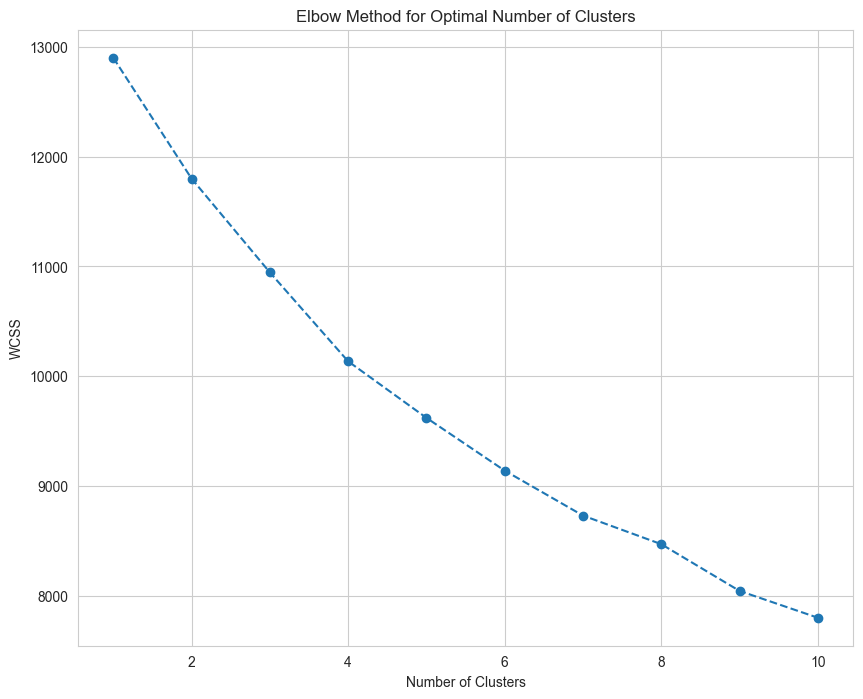

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select the features of the significantly undervalued hotels for clustering
features_for_clustering = significantly_undervalued_hotels[important_features]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



In [55]:
# Apply K-Means clustering with the optimal number of clusters (e.g., 4 clusters)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster labels to the significantly undervalued hotels dataframe using .loc to avoid SettingWithCopyWarning
significantly_undervalued_hotels = significantly_undervalued_hotels.copy()
significantly_undervalued_hotels.loc[:, 'cluster'] = clusters

# Analyze the clusters and generate summary values
for cluster in range(optimal_clusters):
    cluster_data = significantly_undervalued_hotels[significantly_undervalued_hotels['cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data[['price', 'predicted_price', 'price_difference', 'percentage_difference'] + important_features.tolist()])
    print(f"Number of hotels in cluster {cluster}: {len(cluster_data)}")



Cluster 0:
      price  predicted_price  price_difference  percentage_difference  \
6      54.0            87.35            -33.35             -38.179737   
111    60.0            94.95            -34.95             -36.808847   
118    75.0           130.16            -55.16             -42.378611   
184    50.0            78.51            -28.51             -36.313845   
192    40.0           140.71           -100.71             -71.572738   
...     ...              ...               ...                    ...   
5524   45.0           221.07           -176.07             -79.644457   
5566   75.0           129.10            -54.10             -41.905500   
5586   25.0            46.39            -21.39             -46.109075   
5620  130.0           195.15            -65.15             -33.384576   
5832   25.0           137.95           -112.95             -81.877492   

      bedrooms  number_of_reviews  availability_30  room_type_Entire home/apt  \
6          0.1           0.000

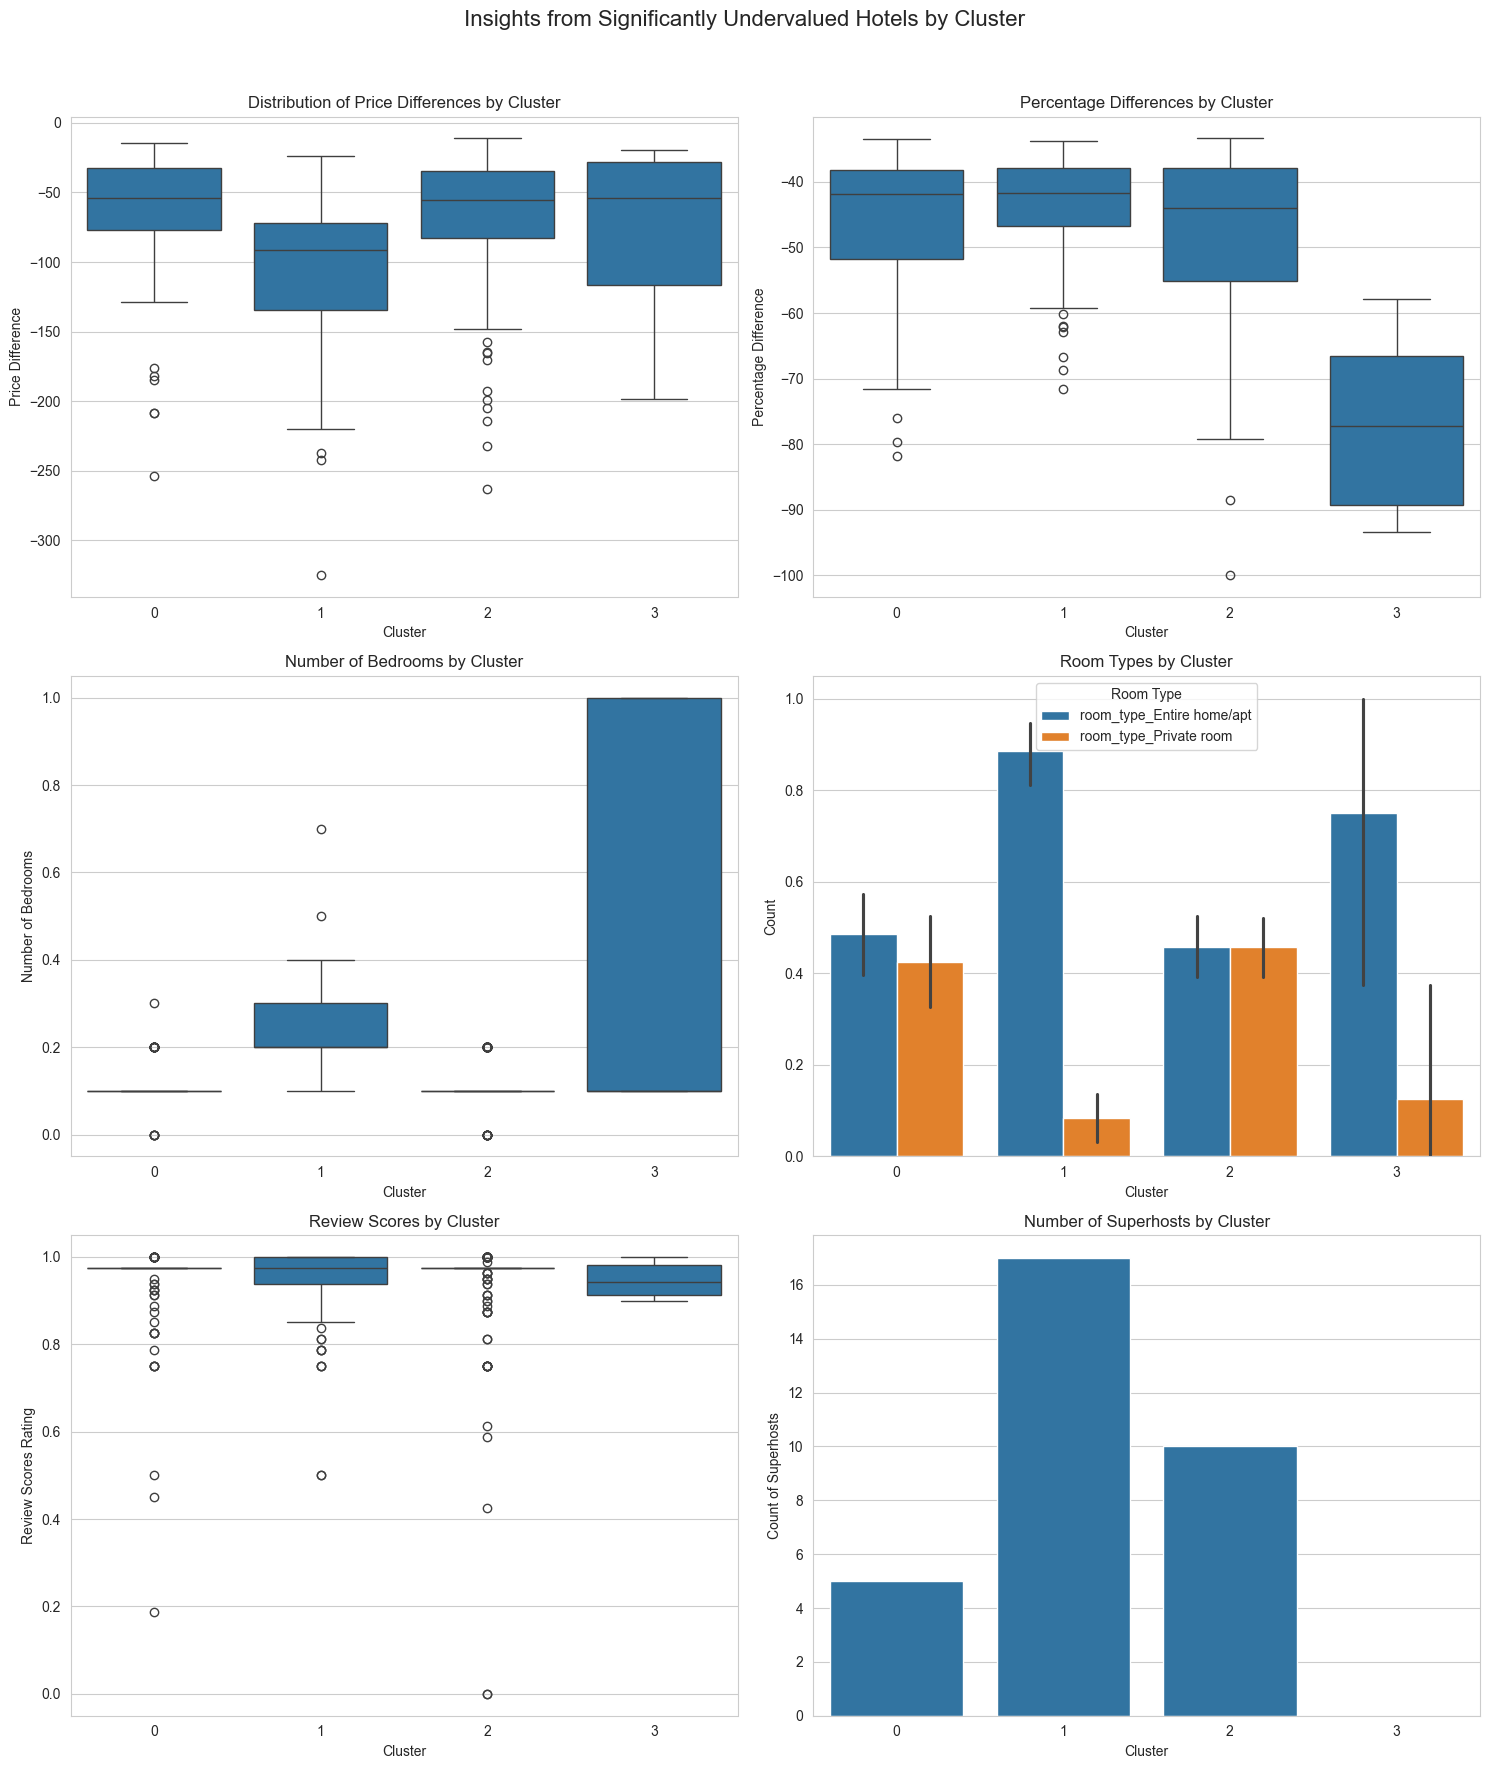

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Insights from Significantly Undervalued Hotels by Cluster', fontsize=16)

# Plot 1: Distribution of Price Differences by Cluster
sns.boxplot(x='cluster', y='price_difference', data=significantly_undervalued_hotels, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Price Differences by Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Price Difference')

# Plot 2: Percentage Differences by Cluster
sns.boxplot(x='cluster', y='percentage_difference', data=significantly_undervalued_hotels, ax=axes[0, 1])
axes[0, 1].set_title('Percentage Differences by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Percentage Difference')

# Plot 3: Number of Bedrooms by Cluster
sns.boxplot(x='cluster', y='bedrooms', data=significantly_undervalued_hotels, ax=axes[1, 0])
axes[1, 0].set_title('Number of Bedrooms by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Number of Bedrooms')

# Plot 4: Room Types by Cluster
room_types = significantly_undervalued_hotels[['cluster', 'room_type_Entire home/apt', 'room_type_Private room']].melt(id_vars='cluster', var_name='Room Type', value_name='Count')
sns.barplot(x='cluster', y='Count', hue='Room Type', data=room_types, ax=axes[1, 1])
axes[1, 1].set_title('Room Types by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Count')

# Plot 5: Review Scores by Cluster
sns.boxplot(x='cluster', y='review_scores_rating', data=significantly_undervalued_hotels, ax=axes[2, 0])
axes[2, 0].set_title('Review Scores by Cluster')
axes[2, 0].set_xlabel('Cluster')
axes[2, 0].set_ylabel('Review Scores Rating')

# Plot 6: Host is Superhost by Cluster
superhost = significantly_undervalued_hotels[['cluster', 'host_is_superhost']].groupby('cluster').sum().reset_index()
sns.barplot(x='cluster', y='host_is_superhost', data=superhost, ax=axes[2, 1])
axes[2, 1].set_title('Number of Superhosts by Cluster')
axes[2, 1].set_xlabel('Cluster')
axes[2, 1].set_ylabel('Count of Superhosts')

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Significant features: ['number_of_reviews', 'availability_30', 'guests_included', 'room_type_Entire home/apt', 'room_type_Private room', 'Dryer', 'Heating', 'Internet', 'Wireless Internet', 'Air conditioning']


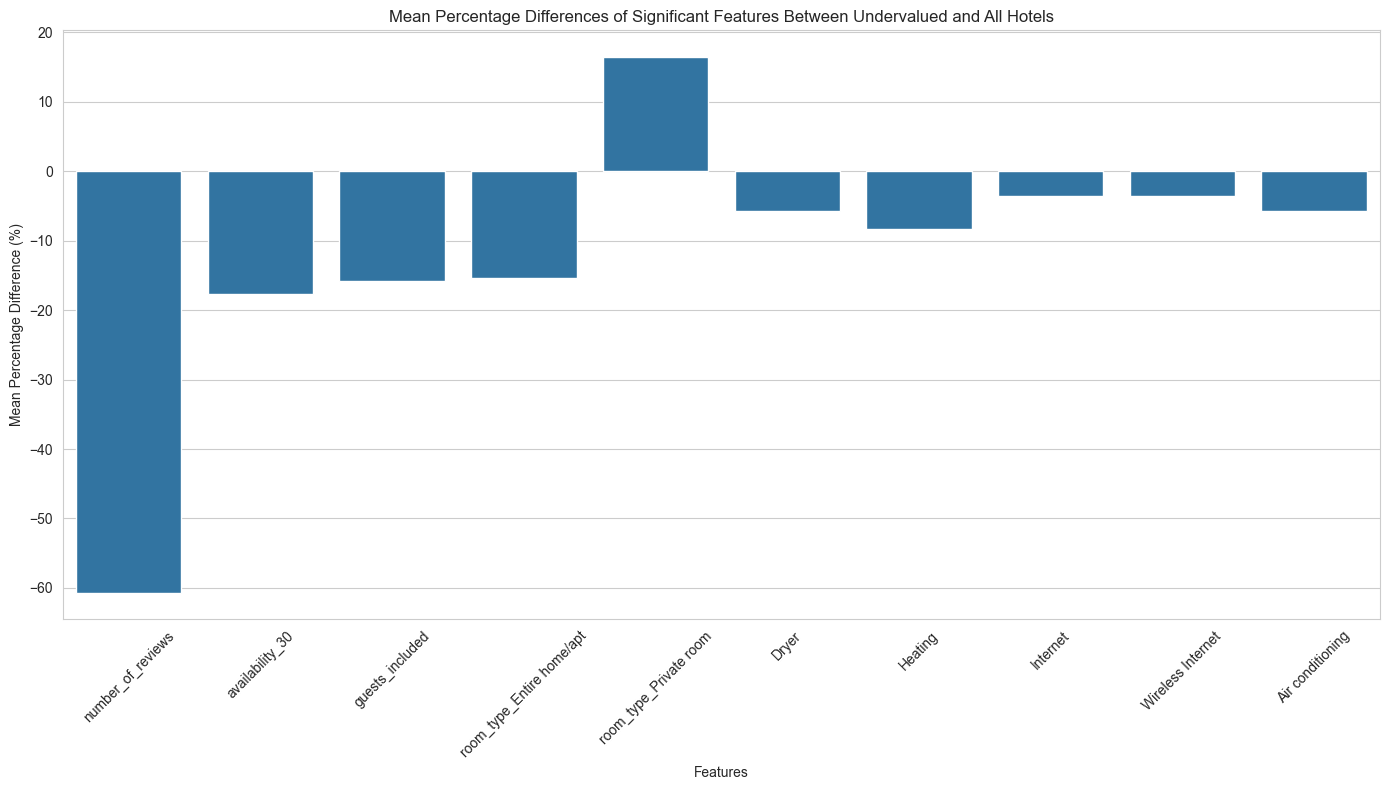

In [57]:
from scipy.stats import ttest_ind, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Add a column to distinguish between undervalued and all hotels
merged_df['category'] = 'All Hotels'
significantly_undervalued_hotels['category'] = 'Undervalued Hotels'

# Combine the dataframes
comparison_df = pd.concat([merged_df, significantly_undervalued_hotels])

# Function to perform t-test for continuous variables and chi-square test for categorical variables
def test_significance(df, feature, categorical=False):
    group1 = df[df['category'] == 'All Hotels'][feature]
    group2 = df[df['category'] == 'Undervalued Hotels'][feature]
    if categorical:
        contingency_table = pd.crosstab(df['category'], df[feature])
        _, p_value, _, _ = chi2_contingency(contingency_table)
    else:
        _, p_value = ttest_ind(group1, group2, nan_policy='omit')
    return p_value

# List of features to test
features_to_test = [
    'review_scores_rating', 'number_of_reviews', 'bathrooms', 'availability_30',
    'accommodates', 'host_listings_count', 'bedrooms', 'beds',
    'maximum_nights', 'guests_included', 'room_type_Entire home/apt', 'room_type_Private room',
    'Essentials', 'Kitchen', 'Washer', 'Dryer',
    'Heating', 'Internet', 'Wireless Internet', 'Air conditioning'
]

# Determine significant features
significant_features = []
alpha = 0.05  # significance level

for feature in features_to_test:
    categorical = 'room_type' in feature or feature in ['Essentials', 'Kitchen', 'Washer', 'Dryer', 'Heating', 'Internet', 'Wireless Internet', 'Air conditioning']
    p_value = test_significance(comparison_df, feature, categorical=categorical)
    if p_value < alpha:
        significant_features.append(feature)

print(f"Significant features: {significant_features[:10]}")

# Calculate mean percentage differences
mean_percentage_diffs = []
for feature in significant_features[:10]:
    mean_all = comparison_df[comparison_df['category'] == 'All Hotels'][feature].mean()
    mean_undervalued = comparison_df[comparison_df['category'] == 'Undervalued Hotels'][feature].mean()
    mean_diff = (mean_undervalued - mean_all) / mean_all * 100
    mean_percentage_diffs.append(mean_diff)

# Create a bar plot for mean percentage differences
plt.figure(figsize=(14, 8))
sns.barplot(x=significant_features[:10], y=mean_percentage_diffs)
plt.title('Mean Percentage Differences of Significant Features Between Undervalued and All Hotels')
plt.xlabel('Features')
plt.ylabel('Mean Percentage Difference (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# old feature eval


In [ ]:
import math
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return r2, mse, rmse

# Initialize dictionaries to store models and their evaluation metrics
gbr_models = {}
rf_models = {}
gbr_metrics = {}
rf_metrics = {}

thresholds = [0.05, 0.01, 0.005]
for threshold in thresholds:
    print(f"\nThreshold: {threshold}")

    best_gbr.fit(X_train, y_train)
    best_rf.fit(X_train, y_train)

    # Gradient Boosting Regressor
    feature_selected_best_gbr = SelectFromModel(best_gbr, threshold=threshold, prefit=True)
    X_train_gbr_selected = feature_selected_best_gbr.transform(X_train)
    X_test_gbr_selected = feature_selected_best_gbr.transform(X_test)
    selected_gbr_features_indices = feature_selected_best_gbr.get_support(indices=True)
    selected_gbr_features = [feature_names[i] for i in selected_gbr_features_indices]
    print("Selected features for Gradient Boosting Regressor:\n", selected_gbr_features)

    gbr_clone = best_gbr  # Clone the original model to avoid overwriting
    gbr_clone.fit(X_train_gbr_selected, y_train)
    y_pred_gbr = gbr_clone.predict(X_test_gbr_selected)
    r2_gbr, mse_gbr, rmse_gbr = evaluate_model(y_test, y_pred_gbr)
    print(f"Gradient Boosting Regressor\n   - R²: {r2_gbr:.4f},\n   - MSE: {mse_gbr:.4f},\n   - RMSE: {rmse_gbr:.4f}")

    gbr_models[threshold] = gbr_clone
    gbr_metrics[threshold] = {'R²': r2_gbr, 'MSE': mse_gbr, 'RMSE': rmse_gbr}

    # Random Forest Regressor
    feature_selected_best_rf = SelectFromModel(best_rf, threshold=threshold, prefit=True)
    X_train_rf_selected = feature_selected_best_rf.transform(X_train)
    X_test_rf_selected = feature_selected_best_rf.transform(X_test)
    selected_rf_features_indices = feature_selected_best_rf.get_support(indices=True)
    selected_rf_features = [feature_names[i] for i in selected_rf_features_indices]
    print("Selected features for Random Forest Regressor:\n", selected_rf_features)

    rf_clone = best_rf  # Clone the original model to avoid overwriting
    rf_clone.fit(X_train_rf_selected, y_train)
    y_pred_rf = rf_clone.predict(X_test_rf_selected)
    r2_rf, mse_rf, rmse_rf = evaluate_model(y_test, y_pred_rf)
    print(f"Random Forest Regressor\n   - R²: {r2_rf:.4f},\n   - MSE: {mse_rf:.4f},\n   - RMSE: {rmse_rf:.4f}")

    rf_models[threshold] = rf_clone
    rf_metrics[threshold] = {'R²': r2_rf, 'MSE': mse_rf, 'RMSE': rmse_rf}
